# Predicting student scores based on study hrs

WITHOUT SKLEARN

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
data=pd.read_csv('student_scores - student_scores.csv')
data.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [18]:
data.shape

(25, 2)

In [19]:

x=data['Hours'].values.reshape(-1,1)
y=data['Scores'].values.reshape(-1,1)

In [20]:
type(x)

numpy.ndarray

In [21]:
m=((len(x)*(x*y).sum())-(x.sum()*y.sum()))/((len(x)*(x*x).sum())-(x.sum()**2))

In [22]:
m

9.77580339078746

In [23]:
c=y.mean()-m*x.mean()

In [24]:
c

2.4836734053732457

In [25]:
new_val=m*9.25+c

In [26]:
new_val

92.90985477015727

WITH SKLEARN

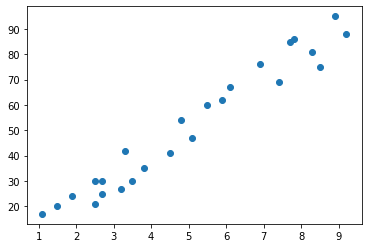

In [27]:
plt.scatter(x,y)

In [28]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x,y)
predictions=reg.predict(x)


Text(0, 0.5, 'Scores')

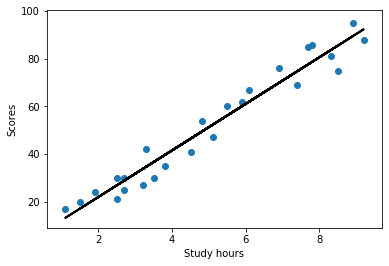

In [29]:
plt.plot(x,predictions,c='black',linewidth=2)
plt.scatter(x,y)
plt.xlabel('Study hours')
plt.ylabel('Scores')

In [30]:
reg.intercept_[0]

2.483673405373196

In [31]:
reg.coef_[0][0]

9.775803390787472

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)

In [33]:
y_pred

array([[85.25493741],
       [16.26189152],
       [91.34255911],
       [76.12350487],
       [94.38636996]])

GRADIENT DESCENT APPROACH

In [43]:
def linear_regression(X, y, m_current=0, b_current=0, iterations=1000, alpha=0.0001):
     N = float(len(y))
     for i in range(iterations):
          y_current = (m_current * X) + b_current
          cost = sum([data**2 for data in (y-y_current)]) / N
          m_gradient = -(2/N) * sum(X * (y - y_current))
          b_gradient = -(2/N) * sum(y - y_current)
          m_current = m_current - (alpha * m_gradient)
          b_current = b_current - ( * b_gradient)
     return m_current, b_current, cost


In [44]:
slope,intercept,c=linear_regression(x,y)

In [45]:
print(slope,intercept,c)

[9.89696411] [1.63147088] [29.03270471]


NORMAL EQUATION METHOD

In [37]:
o = np.ones((len(x),1),dtype='int')
x_bias=np.hstack((o,x))
x_bias

array([[1. , 2.5],
       [1. , 5.1],
       [1. , 3.2],
       [1. , 8.5],
       [1. , 3.5],
       [1. , 1.5],
       [1. , 9.2],
       [1. , 5.5],
       [1. , 8.3],
       [1. , 2.7],
       [1. , 7.7],
       [1. , 5.9],
       [1. , 4.5],
       [1. , 3.3],
       [1. , 1.1],
       [1. , 8.9],
       [1. , 2.5],
       [1. , 1.9],
       [1. , 6.1],
       [1. , 7.4],
       [1. , 2.7],
       [1. , 4.8],
       [1. , 3.8],
       [1. , 6.9],
       [1. , 7.8]])

In [38]:
y.shape

(25, 1)

In [39]:
theta = np.linalg.inv(x_bias.T.dot(x_bias)).dot(x_bias.T).dot(y) # normal equation
theta

array([[2.48367341],
       [9.77580339]])